In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
CAPSC = pd.read_csv("/content/drive/MyDrive/Tp12Simu/ModeloComputacional/FDPs/msha_accident.csv", sep = ";", encoding = "latin1")

/tmp/ipython-input-149865211.py:1: DtypeWarning: Columns (1,3,4,5,6,7,8,12,13,14,15,16,17,23,25,26,27,28,29,30,31,32,33,35,36,37,39,40,41,42,43,44,45,46,50,51,52,53,54,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  CAPSC = pd.read_csv("/content/drive/MyDrive/Tp12Simu/ModeloComputacional/FDPs/msha_accident.csv", sep = ";", encoding = "latin1")


In [4]:
type(CAPSC)

pandas.core.frame.DataFrame

In [5]:
CAPSC.shape

(1048575, 59)

In [6]:
CAPSC.head(10)

,mine_id,cntctr_id,subunit_cd,subunit_desc,ai_dt,inj_degr_desc,ai_class_desc,ai_occ_desc,ai_acty_desc,exper_tot_calc,...,days_lost,trans_term,return_to_work_dt,immed_notify_cd,immed_notify,invest_begin_dt,closed_doc_no,coal_metal_ind,load_dt,ai_year
0,4407259.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",17/11/2025,DAYS AWAY FROM WORK ONLY,OTHER,"Dry screening plant operator, Screen house ope...","Surface equipment, NEC",3.0,...,4.0,N,24/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",M,2025-11-29 00:35:59 EST,2025.0
1,1200063.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",11/11/2025,DAYS RESTRICTED ACTIVITY ONLY,POWERED HAULAGE,"Ledgeman/hand, Quarry man","Utility truck, Water trucks",3.0,...,0.0,N,18/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",M,2025-11-29 00:35:58 EST,2025.0
2,2003454.0,NaN,1.0,UNDERGROUND,11/11/2025,DAYS AWAY FROM WORK ONLY,SLIP OR FALL OF PERSON,"Miner, NEC",Inspect equipment or mine,0.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:03 EST,2025.0
3,101401.0,NaN,1.0,UNDERGROUND,10/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Laborer, Bull gang, Faceman, Parts runner, Rou...",Handling supplies or material,1.0,...,5.0,N,16/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",C,2025-11-29 00:36:03 EST,2025.0
4,4200079.0,NaN,2.0,SURFACE AT UNDERGROUND,10/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Belt foreman, Maintenance foreman, Maintenance...",Handling supplies or material,25.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,C,2025-11-29 00:36:14 EST,2025.0
5,4609111.0,NaN,1.0,UNDERGROUND,8/11/2025,FATALITY,INUNDATION,"Bull gang foreman, Labor foreman, Leadman, Sec...",Supervise,19.0,...,NaN,NaN,NaN,4,INNUMDATION,8/11/2025,NaN,C,2025-11-29 00:36:09 EST,2025.0
6,3102191.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",6/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Dry screening plant operator, Screen house ope...",Machine maintenance,0.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:13 EST,2025.0
7,4609028.0,NaN,1.0,UNDERGROUND,6/11/2025,FATALITY,POWERED HAULAGE,"Scoop tram operator, Load/Haul/Dump operator",Load-haul-dump (UG),4.0,...,0.0,N,NaN,1,DEATH,6/11/2025,NaN,C,2025-11-29 00:36:02 EST,2025.0
8,502666.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",31/10/2025,DAYS AWAY FROM WORK ONLY,HANDTOOLS (NONPOWERED),"Ledgeman/hand, Quarry man",Hand tools (not powered),2.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:13 EST,2025.0
9,4100298.0,NaN,30.0,MILL OPERATION/PREPARATION PLANT,31/10/2025,DAYS AWAY FROM WORK ONLY,SLIP OR FALL OF PERSON,"Electrician, Lineman","Walking, Running",26.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:14 EST,2025.0


In [7]:
CAPSC.dtypes

,0
mine_id,float64
cntctr_id,object
subunit_cd,float64
subunit_desc,object
ai_dt,object
inj_degr_desc,object
ai_class_desc,object
ai_occ_desc,object
ai_acty_desc,object
exper_tot_calc,float64


In [8]:
CAPSC['ai_dt'] = pd.to_datetime(CAPSC['ai_dt'], dayfirst=True)
CAPSC['semana'] = CAPSC['ai_dt'].dt.isocalendar().week
CAPSC['anio'] = CAPSC['ai_dt'].dt.isocalendar().year
APS = CAPSC[(CAPSC.coal_metal_ind == 'C')& (CAPSC.anio >= 2015)][['anio','semana','coal_metal_ind']].groupby(['anio','semana']).count()
APS

coal_metal_ind
anio semana                
2015 1                   71
     2                   78
     3                   72
     4                   71
     5                   88
...                     ...
2025 41                   3
     42                   1
     43                   1
     45                   2
     46                   2

[567 rows x 1 columns]

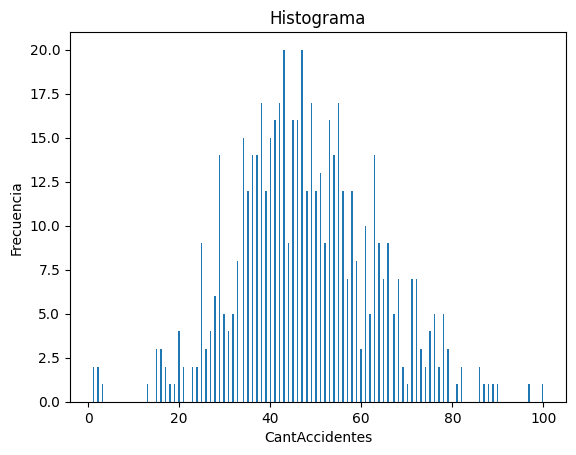

In [9]:
plt.title("Histograma")
plt.xlabel("CantAccidentes")
plt.ylabel("Frecuencia")
plt.hist(APS, bins=300)
plt.show()

In [10]:
pip install fitter

In [11]:
from fitter import Fitter

In [12]:
f = Fitter(APS)

In [13]:
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genhyperbolic,0.001822,1073.891892,1095.593689,inf,0.031216,0.626870
burr,0.001845,1070.131155,1087.492592,inf,0.031873,0.600611
genlogistic,0.001848,1069.385382,1082.406460,inf,0.033635,0.531515
norminvgauss,0.001864,1075.614109,1092.975547,inf,0.033723,0.528128
johnsonsu,0.001869,1076.273774,1093.635211,inf,0.033976,0.518450
nct,0.001877,1076.865574,1094.227011,inf,0.034333,0.504953
dpareto_lognorm,0.001884,1084.560517,1110.602673,inf,0.034748,0.489447
fisk,0.001899,1066.963851,1079.984929,inf,0.037431,0.395180
invgamma,0.001910,1082.529469,1095.550547,inf,0.042127,0.259334
mielke,0.001919,1069.303889,1086.665326,inf,0.042993,0.238503


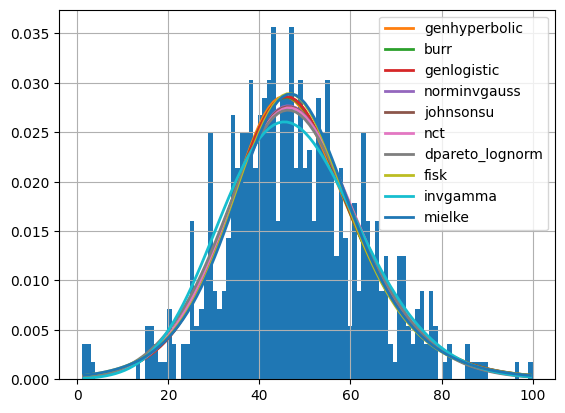

In [14]:
f.summary(10)

In [15]:
f.get_best(method='sumsquare_error')

{'genhyperbolic': {'p': 3.7610237363153907,
  'a': 0.00209573078650936,
  'b': 0.00029747269395355913,
  'loc': 41.82717215116361,
  'scale': 0.011524812451895364}}